In [1]:
import calendar
c = calendar.TextCalendar()
print(c.formatmonth(2024, 1))

    January 2024
Mo Tu We Th Fr Sa Su
 1  2  3  4  5  6  7
 8  9 10 11 12 13 14
15 16 17 18 19 20 21
22 23 24 25 26 27 28
29 30 31



In [29]:
import time as t

lt = [ l for l in range(10000000) ]
# tp = ( t for t in range(10000000) )
tp = tuple(lt)
print(type(lt))
print(type(tp))

<class 'list'>
<class 'tuple'>


In [32]:
start = t.time() # 측정시작. 필수1
for i in lt:
    lts = [1,2,3,4,5,6]
print('list speed check')
print(t.time() - start) # 필수2

list speed check
2.5618207454681396


In [33]:
start2 = t.time() # 측정시작 필수1
for i in tp:
    tps = (1,2,3,4,5,6)
print('tuple speed check')
print(t.time() - start2) # 필수2

tuple speed check
1.1672039031982422


# RESTful(Requests)

## 웹 API(키 없음)

### 환율정보

In [1]:
# 외부 라이브러리.. 환율정보(출처 : 하나은행)
import requests as req
gdata = req.get('https://quotation-api-cdn.dunamu.com/v1/forex/recent?codes=FRX.KRWUSD').json()

In [2]:
print(gdata) # 여기서 date, time와 baseprice 파싱.

[{'code': 'FRX.KRWUSD', 'currencyCode': 'USD', 'currencyName': '달러', 'country': '미국', 'name': '미국 (USD/KRW)', 'date': '2024-01-23', 'time': '09:57:15', 'recurrenceCount': 104, 'basePrice': 1336.4, 'openingPrice': 1334.7, 'highPrice': 1340.8, 'lowPrice': 1334.7, 'change': 'FALL', 'changePrice': 3.6, 'cashBuyingPrice': 1359.78, 'cashSellingPrice': 1313.02, 'ttBuyingPrice': 1323.4, 'ttSellingPrice': 1349.4, 'tcBuyingPrice': None, 'fcSellingPrice': None, 'exchangeCommission': 7.185, 'usDollarRate': 1.0, 'high52wPrice': 1363.5, 'high52wDate': '2023-10-04', 'low52wPrice': 1257.5, 'low52wDate': '2023-07-18', 'currencyUnit': 1, 'provider': '하나은행', 'timestamp': 1705971449962, 'id': 79, 'createdAt': '2016-10-21T06:13:34.000+00:00', 'modifiedAt': '2024-01-23T00:57:30.000+00:00', 'signedChangeRate': -0.0026865672, 'signedChangePrice': -3.6, 'changeRate': 0.0026865672}]


In [3]:
gobj = {
    'date': gdata[0]['date'],
    'time': gdata[0]['time'],
    'basePrice': gdata[0]['basePrice']
}

print(f"{gobj['date']}\t{gobj['time']}\t{gobj['basePrice']}원")

2024-01-23	09:57:15	1336.4원


In [4]:
input = float(input('환전하고 싶은 달러를 입력하세요.') or 10)
res = round(input * gobj['basePrice'], 3)
print(f"지금은 환율 1달러에 {gobj['basePrice']}원 입니다. 요청하신 {input} 달러는 {res}원 입니다.")

환전하고 싶은 달러를 입력하세요. 130.25


지금은 환율 1달러에 1336.4원 입니다. 요청하신 130.25 달러는 174066.1원 입니다.


### 비트코인 정보

In [68]:
import requests as req
gdata = req.get('https://api.bithumb.com/public/ticker/ALL_KRW').json()
gdata

{'status': '0000',
 'data': {'BTC': {'opening_price': '53415000',
   'closing_price': '54933000',
   'min_price': '53407000',
   'max_price': '55439000',
   'units_traded': '3683.64222768',
   'acc_trade_value': '200142510086.3363',
   'prev_closing_price': '53415000',
   'units_traded_24H': '10523.16193347',
   'acc_trade_value_24H': '571076909542.1325',
   'fluctate_24H': '-122000',
   'fluctate_rate_24H': '-0.22'},
  'ETH': {'opening_price': '3025000',
   'closing_price': '3081000',
   'min_price': '3014000',
   'max_price': '3116000',
   'units_traded': '9609.671118',
   'acc_trade_value': '29448351631.7366',
   'prev_closing_price': '3026000',
   'units_traded_24H': '31358.42419453',
   'acc_trade_value_24H': '97114785987.7872',
   'fluctate_24H': '-139000',
   'fluctate_rate_24H': '-4.32'},
  'ETC': {'opening_price': '30630',
   'closing_price': '31600',
   'min_price': '30620',
   'max_price': '32200',
   'units_traded': '289631.3125047',
   'acc_trade_value': '9058289005.5805',

In [69]:
BTC = gdata['data']['BTC']
print(BTC)

{'opening_price': '53415000', 'closing_price': '54933000', 'min_price': '53407000', 'max_price': '55439000', 'units_traded': '3683.64222768', 'acc_trade_value': '200142510086.3363', 'prev_closing_price': '53415000', 'units_traded_24H': '10523.16193347', 'acc_trade_value_24H': '571076909542.1325', 'fluctate_24H': '-122000', 'fluctate_rate_24H': '-0.22'}


In [70]:
# 여기서 최대가, 최소가, 시가 출력
btc = {
    'max': float(BTC['max_price']),
    'min': float(BTC['min_price']),
    'open': float(BTC['opening_price'])
}

In [71]:
print(f"최근 비트코인시세는 1코인당 시가 {btc['open']}원, 최대가 {btc['max']}원, 최소가 {btc['min']}원이 되겠습니다.")

band = btc['max'] - btc['min']

if btc['max'] < ( btc['open'] + band ):
    print('상승장')
else:
    print('하락장')

# 최근 비트코인시세는 1코인당 시가 56155000.0원, 최대가 56368000.0원, 최소가 54556000.0원이 되겠습니다.
# 상승장

최근 비트코인시세는 1코인당 시가 53415000.0원, 최대가 55439000.0원, 최소가 53407000.0원이 되겠습니다.
상승장


### 과제
- 1시간마다 환율, 비트코인 정보 갱신해서 파일화 시키기.

In [17]:
print(gobj, btc)

{'date': '2024-01-23', 'time': '09:57:15', 'basePrice': 1336.4} {'max': 56368000.0, 'min': 54556000.0, 'open': 56155000.0}


In [27]:
!pip3 install keyboard

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 45.9 kB/s eta 0:00:00a 0:00:01


In [37]:
import requests as req
import time as t
import json
import keyboard

def getData():
    gdata = req.get('https://quotation-api-cdn.dunamu.com/v1/forex/recent?codes=FRX.KRWUSD').json()[0]
    gobj = {
        'date': gdata['date'],
        'time': gdata['time'],
        'basePrice': gdata['basePrice']
    }

    gdata = req.get('https://api.bithumb.com/public/ticker/ALL_KRW').json()
    btc = {
        'max': float(BTC['max_price']),
        'min': float(BTC['min_price']),
        'open': float(BTC['opening_price'])
    }

    return { 'frx': gobj, 'btc': btc }

# temp : 60s > origin : 3600s
def fileSaveperOneHour(fname):
    while True:
        jdata = getData()
        
        with open(f'./out/frxbtc/{fname} {t.ctime().strip()}.json', 'w') as f:
            json.dump(jdata, f)
            print(f"save {fname} {t.ctime().strip()}.json")
        t.sleep(60 * 60)
        # if keyboard.is_pressed("q"):
        #     print("exit")
        #     break

In [38]:
fileSaveperOneHour('frxbtcdata')

save frxbtcdata Tue Jan 23 11:36:18 2024.json


KeyboardInterrupt: 

## 웹 API (with 키) REST API GET방식

### 웹상의 데이터 가져오기

In [9]:
import requests as req

url = 'http://apis.data.go.kr/6260000/AirQualityInfoService/getAirQualityInfoClassifiedByStation'
key = 'iLrbtY8SZAyDE7OAPihpSQjCJexAV4+u3rPtAlOEx9Lriv9H79Y1ZVDC8qZ/1IAMK3AqPjJx3kUpcACTHKE0Iw=='
num = 100
params ={'serviceKey' : key, 
         'pageNo' : '1', 
         'numOfRows' : num, 
         'resultType' : 'json'
}

response = req.get(url, params)
rdata = response.json()
# print(rdata)

In [26]:
import time as t

rlist = rdata['getAirQualityInfoClassifiedByStation']['body']['items']['item']

inp = input('원하는 지역이름을 적어주세요.') or '전포동'
start = t.time()
flist = list(filter(lambda c: inp == c['site'], rlist))

if 0 < len(flist):
    for v in flist:
        print(f"=={v['controlnumber']}== {inp} 지역\n 초미세먼지 : {v['pm25']}, 미세먼지 {v['pm10']}")
else:
    print('해당 지역을 찾을 수 없습니다.')
print( t.time() - start )

원하는 지역이름을 적어주세요. 남부민동


해당 지역을 찾을 수 없습니다.
0.0015223026275634766


## 웹 API (with 키) REST API POST방식

### 카카오 kogpt를 통한 post 구현방향 예시

In [2]:
# coding=utf8
# REST API 호출에 필요한 라이브러리
import requests
import json

# [내 애플리케이션] > [앱 키] 에서 확인한 REST API 키 값 입력
REST_API_KEY = 'd15ffdd0dfbdcbd9d93b13a20e35e54c'

# KoGPT API 호출을 위한 메서드 선언
# 각 파라미터 기본값으로 설정
def kogpt_api(prompt, max_tokens = 1, temperature = 1.0, top_p = 1.0, n = 1):
    r = requests.post(
        'https://api.kakaobrain.com/v1/inference/kogpt/generation',
        json = {
            'prompt': prompt,
            'max_tokens': max_tokens,
            'temperature': temperature,
            'top_p': top_p,
            'n': n
        },
        headers = {
            'Authorization': 'KakaoAK ' + REST_API_KEY,
            'Content-Type': 'application/json'
        }
    )
    # 응답 JSON 형식으로 변환
    response = json.loads(r.content)
    return response

In [3]:
# KoGPT에게 전달할 명령어 구성
prompt = '''국내 건설 엔지니어링 업체가 사우디아라비아 상하수도 설계를 맡는다.
엔지니어링업체 '건화'가 사우디아라비아 상하수도 확장·개선사업 설계사로 선정됐다고 환경부가 22일 밝혔다.
 계약 규모는 약 1천16억원(2억9천만리얄)이다.
이번 수주로 상하수도 건설과 시공 등 6조원 규모일 것으로 추산되는 본사업도 국내 건설사가 수주할 가능성이 커졌다고 환경부는 설명했다.
사우디아라비아는 석유 고갈에 대비한 경제 다각화 프로젝트 '비전 2030' 하나로 2050년까지 32조원을 투입해 상하수도를 전면 개편하는 사업을 추진 중이다.
이 사업은 6개 권역으로 나눠 진행되는데 3권역 설계를 건화가 맡는다.
건화는 작년부터 외국 진출 희망 기업과 환경부 소통창구인 '녹색산업 협의체'에 참여해 사우디아라비아 상하수도 사업 설계 수주 전략을 논의해왔다고 한다. 
환경부는 작년 5월 한화진 장관이 사우디아라비아를 방문했을 때 국내 상하수도 설계업체 현지 진출 방안을 현지 당국과 논의한 바 있다. 

한줄 요약:'''

# 파라미터를 전달해 kogpt_api()메서드 호출
response = kogpt_api(
    prompt, max_tokens=128, top_p=0.7
)

print(response)

{'id': 'd71a5cbc-e4ca-428c-bc65-a9b128ca2b1d', 'generations': [{'text': ' 환경부는 해외건설 시장개척 지원프로그램의 일환으로, (주)건화의 사우디아라비아 하수처리시설 공사가 사우디아라비아 현지법인 설립 이후 첫 수주 사례라고 전했다.', 'tokens': 36}], 'usage': {'prompt_tokens': 231, 'generated_tokens': 36, 'total_tokens': 267}}


### 카카오 API karlo를 통한 post예시

In [6]:
!pip3 install Pillow

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 687.5 kB/s eta 0:00:0000:0100:01


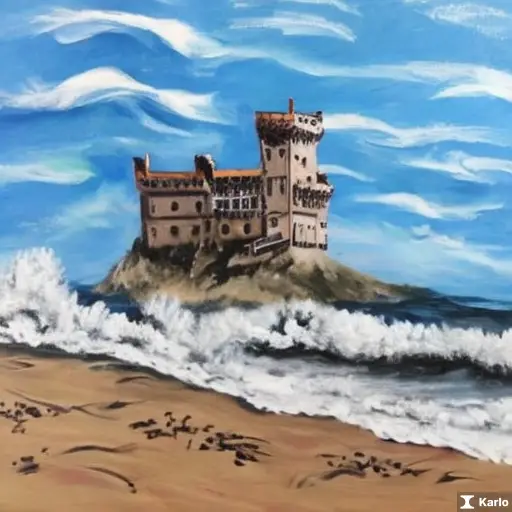

In [34]:
# REST API 호출, 이미지 파일 처리에 필요한 라이브러리
import requests
import json
import urllib
from PIL import Image

# [내 애플리케이션] > [앱 키] 에서 확인한 REST API 키 값 입력
REST_API_KEY = 'd15ffdd0dfbdcbd9d93b13a20e35e54c'

# 이미지 생성하기 요청
def t2i(prompt, negative_prompt):
    r = requests.post(
        'https://api.kakaobrain.com/v2/inference/karlo/t2i',
        json = {
            'prompt': prompt,
            'negative_prompt': negative_prompt
        },
        headers = {
            'Authorization': f'KakaoAK {REST_API_KEY}',
            'Content-Type': 'application/json'
        }
    )
    # 응답 JSON 형식으로 변환
    response = json.loads(r.content)
    return response

# 프롬프트에 사용할 제시어
prompt = "castle painting waves"
negative_prompt = "Twinkle, lake, waterfall"

# 이미지 생성하기 REST API 호출
response = t2i(prompt, negative_prompt)
# print(response['images'][0]['image'])

res = Image.open(urllib.request.urlopen(response.get("images")[0].get("image")))
res
# 응답의 첫 번째 이미지 생성 결과 출력하기
# result = Image.open(urllib.request.urlopen(response.get("images")[0].get("image")))
# result.show()

### 번역기 만들어보기

In [38]:
import os
import sys
import urllib.request
import json

client_id = "OeHnMabxLqdA2cEOWpG6" # 개발자센터에서 발급받은 Client ID 값
client_secret = "I3XxZoxmS4" # 개발자센터에서 발급받은 Client Secret 값

In [58]:
indata = input('영어로 번역할 내용입력.') or "반갑습니다."

encText = urllib.parse.quote(indata)
data = "source=ko&target=en&text=" + encText
url = "https://openapi.naver.com/v1/papago/n2mt"
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request, data=data.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body = json.loads(response.read().decode('utf-8'))
    print(response_body['message']['result']['translatedText'])
else:
    print("Error Code:" + rescode)

영어로 번역할 내용입력. 영상을 보고있음


I'm watching a video


### 뉴스뽑아보기

In [61]:
client_id = "cp4RsnyUJ9uu50M9W3Wn" # 개발자센터에서 발급받은 Client ID 값
client_secret = "wAmpKLpxFc" # 개발자센터에서 발급받은 Client Secret 값

In [63]:
# 덤으로 속보검색
indata = input('검색할 키워드') or "속보"

url = "https://openapi.naver.com/v1/search/news?query=" + encText # JSON 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = json.loads(response.read().decode('utf-8'))
    print(response_body)
else:
    print("Error Code:" + rescode)


# 네이버 검색 API 예제 - 블로그 검색


# if(rescode==200):
#     response_body = response.read()
#     print(response_body.decode('utf-8'))
# else:
#     print("Error Code:" + rescode)

검색할 키워드 


{'lastBuildDate': 'Tue, 23 Jan 2024 16:50:57 +0900', 'total': 1918605, 'start': 1, 'display': 10, 'items': [{'title': '서천시장 화재 원인…이것 때문에 점포 227개 모두 불에 타버렸다', 'originallink': 'https://www.wikitree.co.kr/articles/920882', 'link': 'https://www.wikitree.co.kr/articles/920882', 'description': '확인 결과 자동화재<b>속보</b>기는 불꽃이 시작된 지 16분 만인 이날 오후 11시 8분쯤 작동했다. 119 종합상황실로 자동 접수돼 3분 만에 선착 소방대가 도착했다. 경찰은 동작 감지가 아닌 열 감지 방식의 무인경비시스템이... ', 'pubDate': 'Tue, 23 Jan 2024 16:50:00 +0900'}, {'title': "[증권사 동향] 증권사, 올해 AI 기술 경쟁력 확보 '치열'...강자는 누구?", 'originallink': 'http://www.lkp.news/news/articleView.html?idxno=42765', 'link': 'http://www.lkp.news/news/articleView.html?idxno=42765', 'description': "올해 출시한 서비스만 보면 AI를 활용해 미국기업 실적<b>속보</b>를 전해주는 '어닝콜 읽어주는 AI 서비스', 해외 주요 언론사의 기사를 번역해 제공하는 '해외뉴스 번역 서비스'를 출시했다. 또, 개별 종목의 시황과 주요... ", 'pubDate': 'Tue, 23 Jan 2024 16:46:00 +0900'}, {'title': '[<b>속보</b>] 한동훈 &quot;대통령에 깊은 존중·신뢰…민생에 관한 이야기 나눴다&quot;', 'originallink': 'https://www.busan.com/view/busan/view.php?code=20

In [64]:
lastdate = response_body['lastBuildDate']
articles = response_body['items']
print(lastdate, articles)

Tue, 23 Jan 2024 16:50:57 +0900 [{'title': '서천시장 화재 원인…이것 때문에 점포 227개 모두 불에 타버렸다', 'originallink': 'https://www.wikitree.co.kr/articles/920882', 'link': 'https://www.wikitree.co.kr/articles/920882', 'description': '확인 결과 자동화재<b>속보</b>기는 불꽃이 시작된 지 16분 만인 이날 오후 11시 8분쯤 작동했다. 119 종합상황실로 자동 접수돼 3분 만에 선착 소방대가 도착했다. 경찰은 동작 감지가 아닌 열 감지 방식의 무인경비시스템이... ', 'pubDate': 'Tue, 23 Jan 2024 16:50:00 +0900'}, {'title': "[증권사 동향] 증권사, 올해 AI 기술 경쟁력 확보 '치열'...강자는 누구?", 'originallink': 'http://www.lkp.news/news/articleView.html?idxno=42765', 'link': 'http://www.lkp.news/news/articleView.html?idxno=42765', 'description': "올해 출시한 서비스만 보면 AI를 활용해 미국기업 실적<b>속보</b>를 전해주는 '어닝콜 읽어주는 AI 서비스', 해외 주요 언론사의 기사를 번역해 제공하는 '해외뉴스 번역 서비스'를 출시했다. 또, 개별 종목의 시황과 주요... ", 'pubDate': 'Tue, 23 Jan 2024 16:46:00 +0900'}, {'title': '[<b>속보</b>] 한동훈 &quot;대통령에 깊은 존중·신뢰…민생에 관한 이야기 나눴다&quot;', 'originallink': 'https://www.busan.com/view/busan/view.php?code=2024012316400372737', 'link': 'https://n.news.naver.com/mnews/article/082/000

In [66]:
!pip3 install pandas

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 MB 701.4 kB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 kB 488.5 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 667.4 kB/s eta 0:00:0000:0100:01


In [67]:
import pandas as pd
pdarts = pd.DataFrame(articles)
pdarts

/tmp/ipykernel_5381/1397159497.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,title,originallink,link,description,pubDate
0,서천시장 화재 원인…이것 때문에 점포 227개 모두 불에 타버렸다,https://www.wikitree.co.kr/articles/920882,https://www.wikitree.co.kr/articles/920882,확인 결과 자동화재<b>속보</b>기는 불꽃이 시작된 지 16분 만인 이날 오후 1...,"Tue, 23 Jan 2024 16:50:00 +0900"
1,"[증권사 동향] 증권사, 올해 AI 기술 경쟁력 확보 '치열'...강자는 누구?",http://www.lkp.news/news/articleView.html?idxn...,http://www.lkp.news/news/articleView.html?idxn...,올해 출시한 서비스만 보면 AI를 활용해 미국기업 실적<b>속보</b>를 전해주는 ...,"Tue, 23 Jan 2024 16:46:00 +0900"
2,[<b>속보</b>] 한동훈 &quot;대통령에 깊은 존중·신뢰…민생에 관한 이야기...,https://www.busan.com/view/busan/view.php?code...,https://n.news.naver.com/mnews/article/082/000...,국민의힘 한동훈 비상대책위원장은 23일 &quot;대통령님에 대해 깊은 존중과 신뢰...,"Tue, 23 Jan 2024 16:44:00 +0900"
3,[<b>속보</b>]“尹과 갈등 봉합?” 질문에…한동훈 “대통령에 깊은 존중·신뢰”,https://www.mk.co.kr/article/10927576,https://n.news.naver.com/mnews/article/009/000...,한동훈 국민의힘 비상대책위원장은 23일 최근 불거진 윤석열 대통령과의 갈등설에 대해...,"Tue, 23 Jan 2024 16:34:00 +0900"
4,"[<b>속보</b>] 정부, '서천시장 화재' 복구에 특별교부세 20억 지원",https://www.daejonilbo.com/news/articleView.ht...,https://n.news.naver.com/mnews/article/656/000...,행정안전부가 충남 서천특화시장 화재의 조속한 피해 복구를 위해 충남 서천군에 특별교...,"Tue, 23 Jan 2024 16:34:00 +0900"
5,[<b>속보</b>] 한동훈 &quot;윤 대통령에 대한 깊은 존중과 신뢰 변함 없...,https://www.ajunews.com/view/20240123162826226,https://www.ajunews.com/view/20240123162826226,아주경제=정연우 기자 ynu@ajunews.com,"Tue, 23 Jan 2024 16:32:00 +0900"
6,[<b>속보</b>] 한동훈 &quot;대통령에 깊은 존중·신뢰…지금보다 더 최선 ...,http://mbn.mk.co.kr/pages/news/newsView.php?ca...,https://n.news.naver.com/mnews/article/057/000...,한동훈 &quot;대통령에 깊은 존중·신뢰…지금보다 더 최선 다할 것&quot;,"Tue, 23 Jan 2024 16:31:00 +0900"
7,인플레 꺾인 미국 증시 연일 사상 최고…FOMO vs. 신중론,http://www.metroseoul.co.kr/article/2024012350...,http://www.metroseoul.co.kr/article/2024012350...,12월 개인소비지출(PCE) 가격지수 등 연준이 눈여겨볼 인플레이션 지표와 함께 4...,"Tue, 23 Jan 2024 16:30:00 +0900"
8,[<b>속보</b>] 한동훈 “대통령님에 대한 깊은 존중과 신뢰 변함 없다”,https://news.kmib.co.kr/article/view.asp?arcid...,https://n.news.naver.com/mnews/article/005/000...,한동훈 국민의힘 비상대책위원장은 “윤 대통령에 대해 깊은 존중과 신뢰의 마음을 갖고...,"Tue, 23 Jan 2024 16:27:00 +0900"
9,"[<b>속보</b>]한동훈 위원장, 尹 대통령 만난 뒤 &quot;대통령님에 깊은 ...",http://www.kookje.co.kr/news2011/asp/newsbody....,https://n.news.naver.com/mnews/article/658/000...,국민의힘 한동훈 비상대책위원장은 23일 “대통령님에 대해서 깊은 존중과 신뢰의 마음...,"Tue, 23 Jan 2024 16:26:00 +0900"
